In [2]:
import sys
sys.path.append('Outputs_o1')
import matplotlib.pyplot as plt

import HF
import numpy as np
import inspect

In [3]:
def combine_code(library, code):
    return inspect.getsource(library) + inspect.getsource(code)

In [4]:
def plot_kspace(kspace):
    fig, ax = plt.subplots(figsize=(3,3),tight_layout=True)
    ax.scatter(*kspace.T,s=2)
    ax.set_aspect('equal')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
def plot_matele(mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.spy((mat))
    ax.set_title('$H_0$')
def plot_2d_bandstructure(ham,en):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(en.shape[0]):
        ax.plot_trisurf(ham.k_space[:,0],ham.k_space[:,1],en[i])
def plot_high_symm_bandstructure(k_list,en,ax=None): # DROP
    if ax is None:
        fig, ax = plt.subplots()
    for e in en:
        k_abs=np.sqrt(np.diff(k_list[:,0])**2 + np.diff(k_list[:,1])**2)
        k_abs = np.concatenate([[0],np.cumsum(k_abs)])
        ax.plot(k_abs,e,color='k')
    Nk = (k_list.shape[0]-1)//4
    for i in range(5):
        ax.axvline(k_abs[Nk*i],ls='--',color='r')
    ax.set_xticks([k_abs[Nk*i] for i in range(5)],['$\Gamma$','K','M','$\Gamma$',"K'"])
    # ax.set_xlim([k_abs[0],k_abs[-1]])

    

In [ ]:
import code_2004_04168 as lm_code
exec(combine_code(HF, lm_code))


# Check k-space

In [7]:
ham = HartreeFockHamiltonian(N_shell=10)

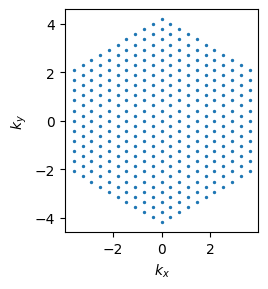

In [8]:
plot_kspace(kspace=ham.k_space)
# plt.scatter(ham.high_symm)
# plt.plot(*k_list.T)

In [9]:
high_symm= ham.high_symmetry_points(line=None)

AttributeError: 'HartreeFockHamiltonian' object has no attribute 'high_symmetry_points'

In [79]:
high_symm

{'Gamma': array([0, 0]),
 'M': array([0.19975211, 0.        ]),
 "M'": array([0.09987605, 0.1729904 ]),
 'K': array([0.19975211, 0.11532693]),
 "K'": array([ 0.19975211, -0.11532693])}

# Check Lincut/2D plot

In [ ]:
# ham=PLG_manual.HartreeFockHamiltonian(N_shell=10)

In [10]:
h_nonint = ham.generate_non_interacting()

In [11]:
wf,en= diagonalize(h_nonint) # or HF.diagonalize

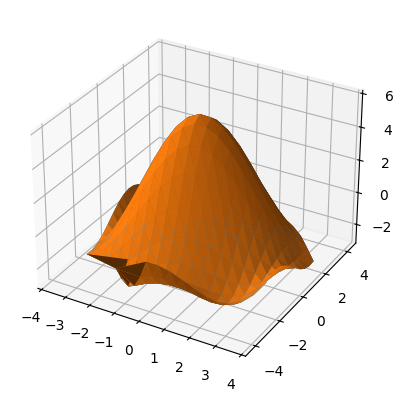

In [12]:
plot_2d_bandstructure(ham,en)

idx is the last N_flavor of the eigenvalue

In [16]:
idx = en.shape[0]-1
print(idx)

1


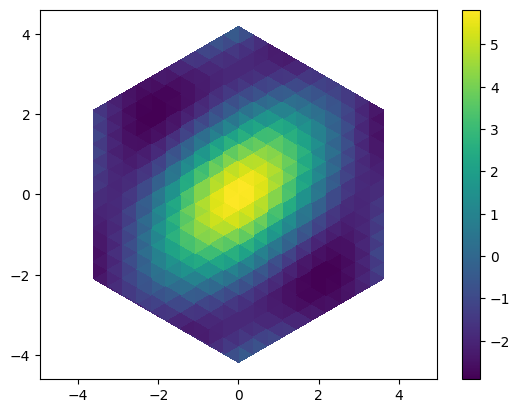

In [17]:
plt.tripcolor(ham.k_space[:,0],ham.k_space[:,1],en[idx])
plt.axis('equal')
plt.colorbar()

# High symmetry points linecut (Skipped because of issue)

In [ ]:
#ham=HartreeFockHamiltonian(N_shell=10)

Issue: No a / a_M in the code

In [ ]:
k_list = generate_high_symmtry_points

In [17]:
h_0_linecut= ham.generate_non_interacting(k_list)


In [18]:
wf,en=HF.diagonalize(h_0_linecut)

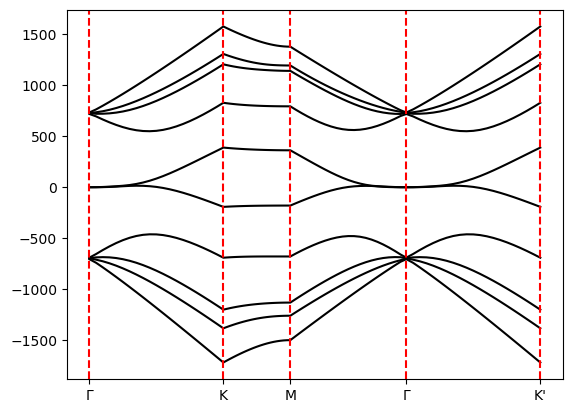

In [19]:
plot_high_symm_bandstructure(k_list,en)


In [ ]:
Mistake:
it should include valley and spin index
misses all moire superlattice
Band is too flat, I highly suspect the correctness

#  infinitesemial U limit

Manual: Figure out which parameter dials down interaction term. This might be a dict, and not a float

In [22]:
int_strength_default = ham.default_U_n()
inf_u = {}
for key in int_strength_default:
    inf_u[key] = 1e-6*int_strength_default[key]

In [23]:
ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'U_n': inf_u})

In [24]:
wf,en= diagonalize(ham_int.generate_non_interacting())
exp_val= get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= solve(ham_int,0*exp_val,100)

Convergence reached at iteration 1


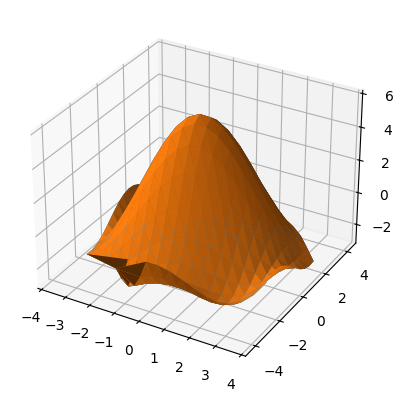

In [26]:
plot_2d_bandstructure(ham_int,en_int)

# Large U limit

Doesn't yield a different plot...

In [37]:
int_strength_default = ham.default_U_n()
big_u = {}
for key in int_strength_default:
    big_u[key] = 1e20*int_strength_default[key]

In [38]:
ham_int= HartreeFockHamiltonian(N_shell=10,parameters={'epsilon': big_u})

In [39]:
wf,en=HF.diagonalize(ham_int.generate_non_interacting())
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [40]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


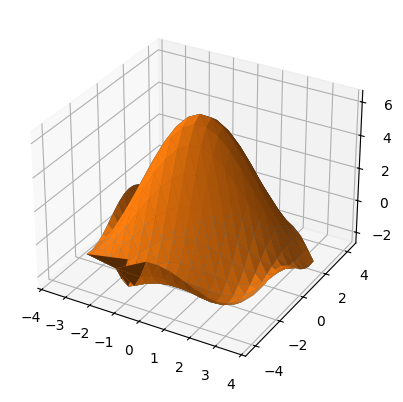

In [41]:
plot_2d_bandstructure(ham_int,en_int)

In [43]:
mean_U=np.abs(ham_int.generate_interacting(exp_val)).mean() 
mean_T=np.abs(ham_int.generate_non_interacting()).mean() 
gap = en_int[idx].min()-en_int[idx-1].max()

In [44]:
mean_U

0.25075528700906347

In [45]:
print(f'Gap is {gap:.2f}')
print(f'U/T is {mean_U/mean_T:.2f}')
print(f'mean_U is {mean_U:.2f}')

Gap is -8.99
U/T is 0.25
mean_U is 0.25


In [ ]:
Mistake: The summation should include different valley and spin  